**Imported the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
dataset = pd.read_csv('/content/waste_sensor_data - waste_sensor_data.csv')
print(dataset)

       sensor_id            timestamp      waste_type  inductive_property  \
0              3  2023-09-01 12:00:00  non_recyclable                0.90   
1              4  2023-09-01 12:15:00      recyclable                1.18   
2              3  2023-09-01 12:30:00  non_recyclable                0.87   
3              2  2023-09-01 12:45:00         organic                1.00   
4              3  2023-09-01 13:00:00      recyclable                1.39   
...          ...                  ...             ...                 ...   
19995          4  2024-03-27 18:45:00  non_recyclable                1.30   
19996          4  2024-03-27 19:00:00  non_recyclable                0.68   
19997          3  2024-03-27 19:15:00  non_recyclable                1.12   
19998          2  2024-03-27 19:30:00         organic                1.18   
19999          4  2024-03-27 19:45:00  non_recyclable                1.22   

       capacitive_property  moisture_property  infrared_property  
0       

In [ ]:
dataset.head()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,3,2023-09-01 12:00:00,non_recyclable,0.90,0.12,0.47,16.27
1,4,2023-09-01 12:15:00,recyclable,1.18,0.66,0.33,36.00
2,3,2023-09-01 12:30:00,non_recyclable,0.87,0.14,0.83,58.89
3,2,2023-09-01 12:45:00,organic,1.00,0.37,0.52,91.80
4,3,2023-09-01 13:00:00,recyclable,1.39,0.88,0.76,98.83


In [ ]:
dataset.describe()

,sensor_id,inductive_property,capacitive_property,moisture_property,infrared_property
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.495900,1.003058,0.501873,0.501766,50.180508
std,1.115188,0.230327,0.288173,0.288086,28.836594
min,1.000000,0.600000,0.000000,0.000000,0.010000
25%,2.000000,0.810000,0.250000,0.250000,25.337500
50%,2.000000,1.000000,0.510000,0.500000,50.090000
75%,3.000000,1.200000,0.750000,0.750000,74.972500
max,4.000000,1.400000,1.000000,1.000000,100.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sensor_id            20000 non-null  int64  
 1   timestamp            20000 non-null  object 
 2   waste_type           20000 non-null  object 
 3   inductive_property   20000 non-null  float64
 4   capacitive_property  20000 non-null  float64
 5   moisture_property    20000 non-null  float64
 6   infrared_property    20000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
dataset.isnull()

,sensor_id,timestamp,waste_type,inductive_property,capacitive_property,moisture_property,infrared_property
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False


In [ ]:
print(dataset.isnull().sum())

sensor_id              0
timestamp              0
waste_type             0
inductive_property     0
capacitive_property    0
moisture_property      0
infrared_property      0
dtype: int64


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(
transformers=[
    ('onehot',OneHotEncoder(),['waste_type'])
],remainder ='passthrough')

In [ ]:
encoded_data = ct.fit_transform(dataset)
encoded_columns = ct.get_feature_names_out()
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
print(encoded_df.head())

  onehot__waste_type_non_recyclable onehot__waste_type_organic  \
0                               1.0                        0.0   
1                               0.0                        0.0   
2                               1.0                        0.0   
3                               0.0                        1.0   
4                               0.0                        0.0   

  onehot__waste_type_recyclable remainder__sensor_id remainder__timestamp  \
0                           0.0                    3  2023-09-01 12:00:00   
1                           1.0                    4  2023-09-01 12:15:00   
2                           0.0                    3  2023-09-01 12:30:00   
3                           0.0                    2  2023-09-01 12:45:00   
4                           1.0                    3  2023-09-01 13:00:00   

  remainder__inductive_property remainder__capacitive_property  \
0                           0.9                           0.12   
1       

In [ ]:

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])


dataset['year'] = dataset['timestamp'].dt.year
dataset['month'] = dataset['timestamp'].dt.month
dataset['day'] = dataset['timestamp'].dt.day
dataset['hour'] = dataset['timestamp'].dt.hour
dataset['minute'] = dataset['timestamp'].dt.minute



In [ ]:
from sklearn.model_selection import train_test_split
x = encoded_df.drop(columns=['onehot__waste_type_non_recyclable', 'onehot__waste_type_organic', 'onehot__waste_type_recyclable'])
y = encoded_df[['onehot__waste_type_non_recyclable', 'onehot__waste_type_organic', 'onehot__waste_type_recyclable']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16000, 6)
X_test shape: (4000, 6)
y_train shape: (16000, 3)
y_test shape: (4000, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
numeric_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(dataset[numeric_columns])
standardized_df = pd.DataFrame(standardized_data, columns=[f"{col}_standardized" for col in numeric_columns])
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(dataset[numeric_columns])
normalized_df = pd.DataFrame(normalized_data, columns=[f"{col}_normalized" for col in numeric_columns])

In [ ]:
dataset_with_scaled_features = pd.concat([dataset, standardized_df, normalized_df], axis=1)
print(dataset_with_scaled_features.head())

   sensor_id           timestamp      waste_type  inductive_property  \
0          3 2023-09-01 12:00:00  non_recyclable                0.90   
1          4 2023-09-01 12:15:00      recyclable                1.18   
2          3 2023-09-01 12:30:00  non_recyclable                0.87   
3          2 2023-09-01 12:45:00         organic                1.00   
4          3 2023-09-01 13:00:00      recyclable                1.39   

   capacitive_property  moisture_property  infrared_property  year  month  \
0                 0.12               0.47              16.27  2023      9   
1                 0.66               0.33              36.00  2023      9   
2                 0.14               0.83              58.89  2023      9   
3                 0.37               0.52              91.80  2023      9   
4                 0.88               0.76              98.83  2023      9   

   day  hour  minute  inductive_property_standardized  \
0    1    12       0                        -0.

In [ ]:
numeric_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']

In [ ]:
def remove_outliers_iqr(data, columns):
    cleaned_data = data.copy()
    for column in columns:
        Q1 = cleaned_data[column].quantile(0.25)  # 25th percentile (Q1)
        Q3 = cleaned_data[column].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile Range

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows with outliers
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

In [ ]:
cleaned_dataset = remove_outliers_iqr(dataset, numeric_columns)

# Display the shapes before and after outlier removal
print("Original dataset shape:", dataset.shape)
print("Cleaned dataset shape:", cleaned_dataset.shape)

Original dataset shape: (20000, 12)
Cleaned dataset shape: (20000, 12)


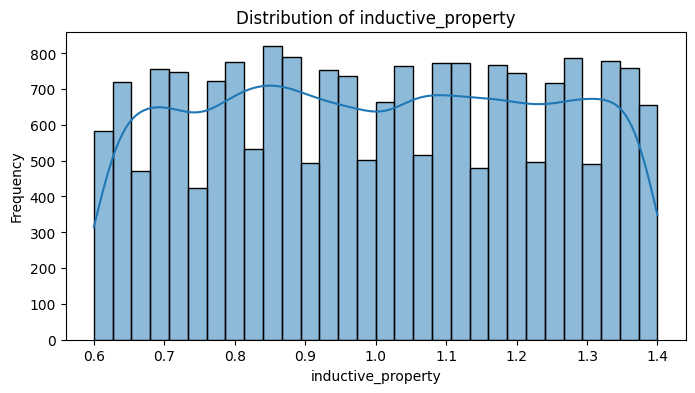

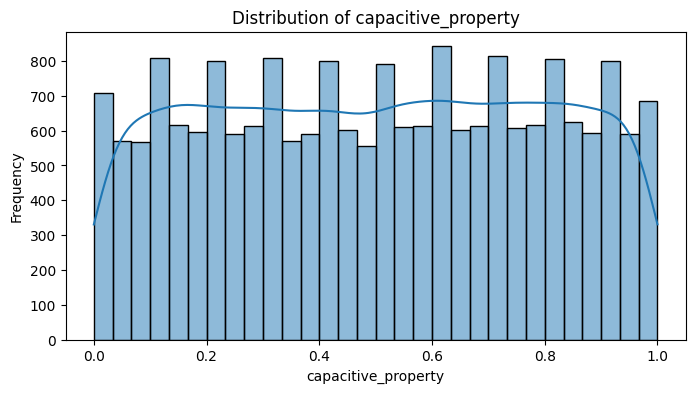

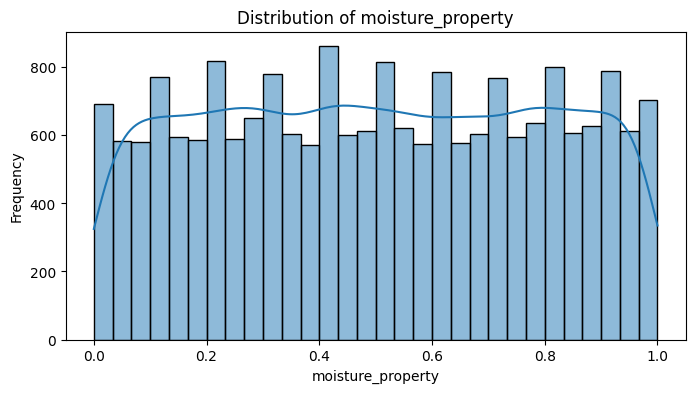

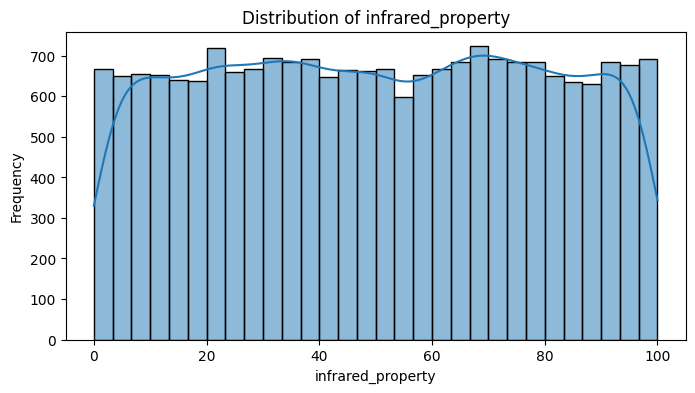

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']

for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

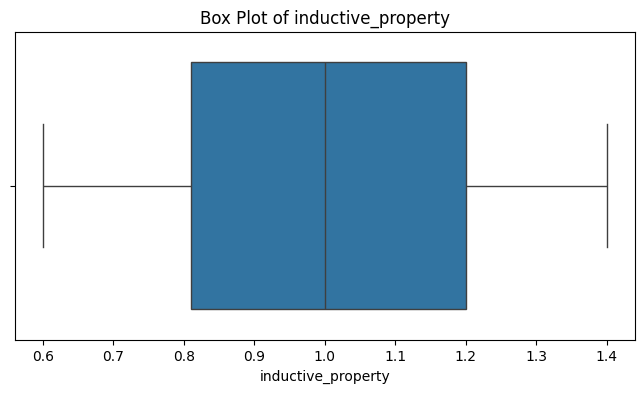

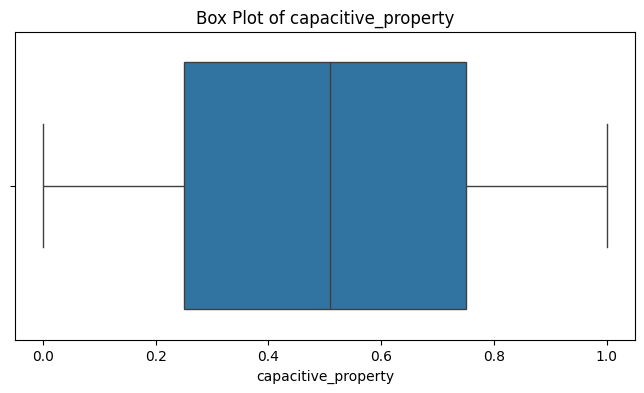

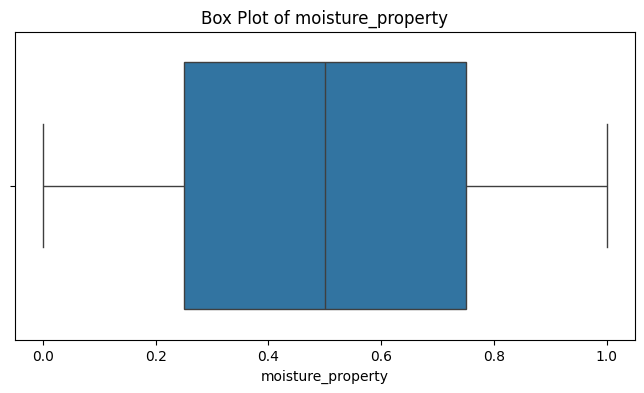

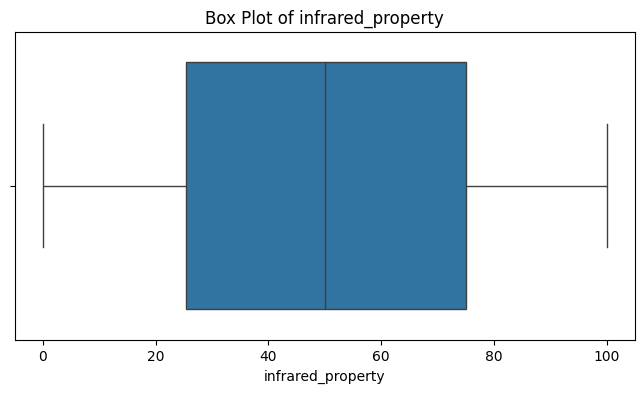

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=dataset, x=column)
    plt.title(f"Box Plot of {column}")
    plt.show()


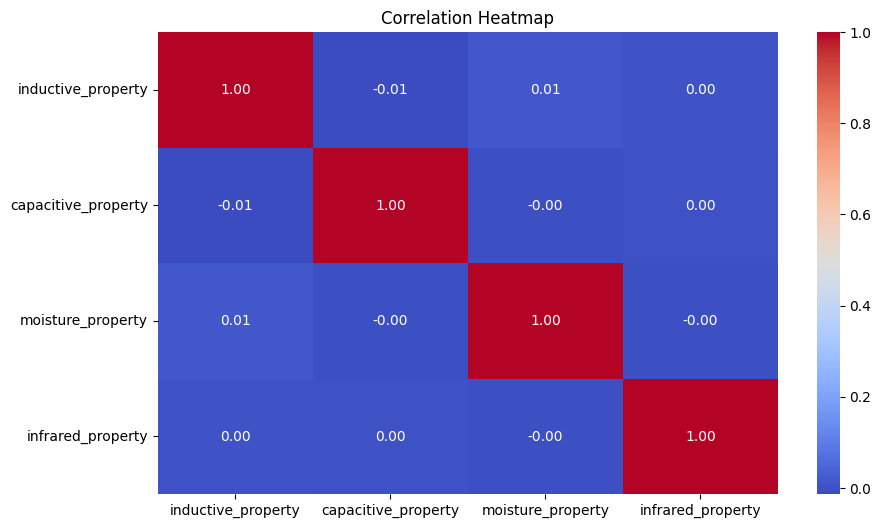

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = dataset[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

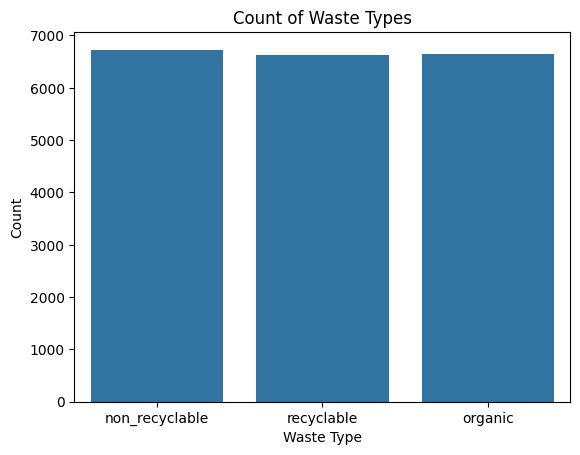

In [ ]:
sns.countplot(data=dataset, x='waste_type')
plt.title("Count of Waste Types")
plt.xlabel("Waste Type")
plt.ylabel("Count")
plt.show()

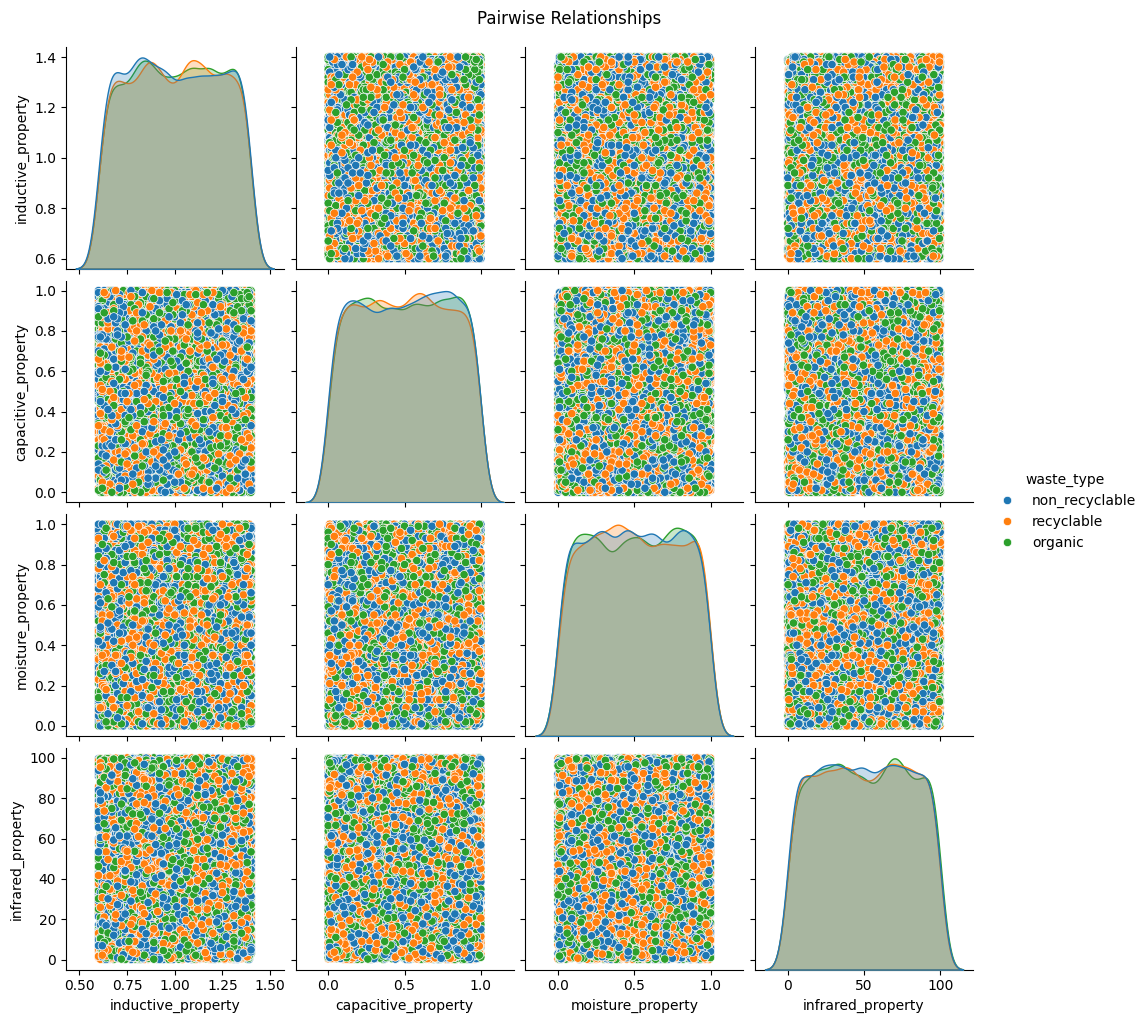

In [ ]:
sns.pairplot(dataset, hue='waste_type', vars=numeric_columns)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

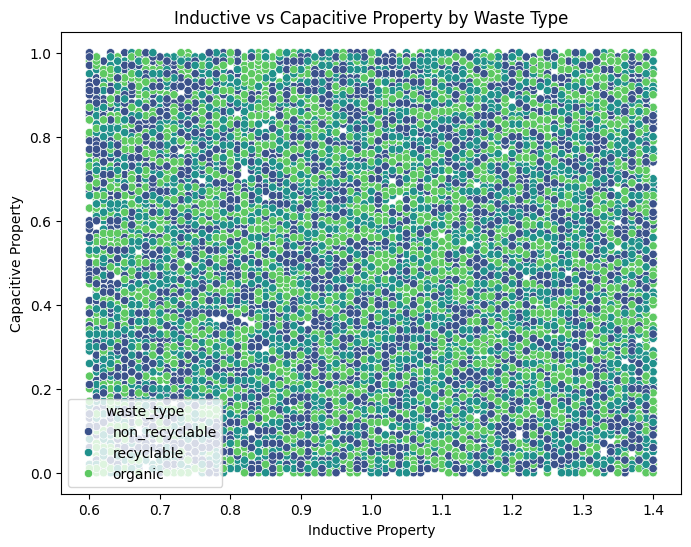

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dataset, x='inductive_property', y='capacitive_property', hue='waste_type', palette='viridis')
plt.title("Inductive vs Capacitive Property by Waste Type")
plt.xlabel("Inductive Property")
plt.ylabel("Capacitive Property")
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = dataset.drop(columns=['waste_type'])
y = dataset['waste_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.35


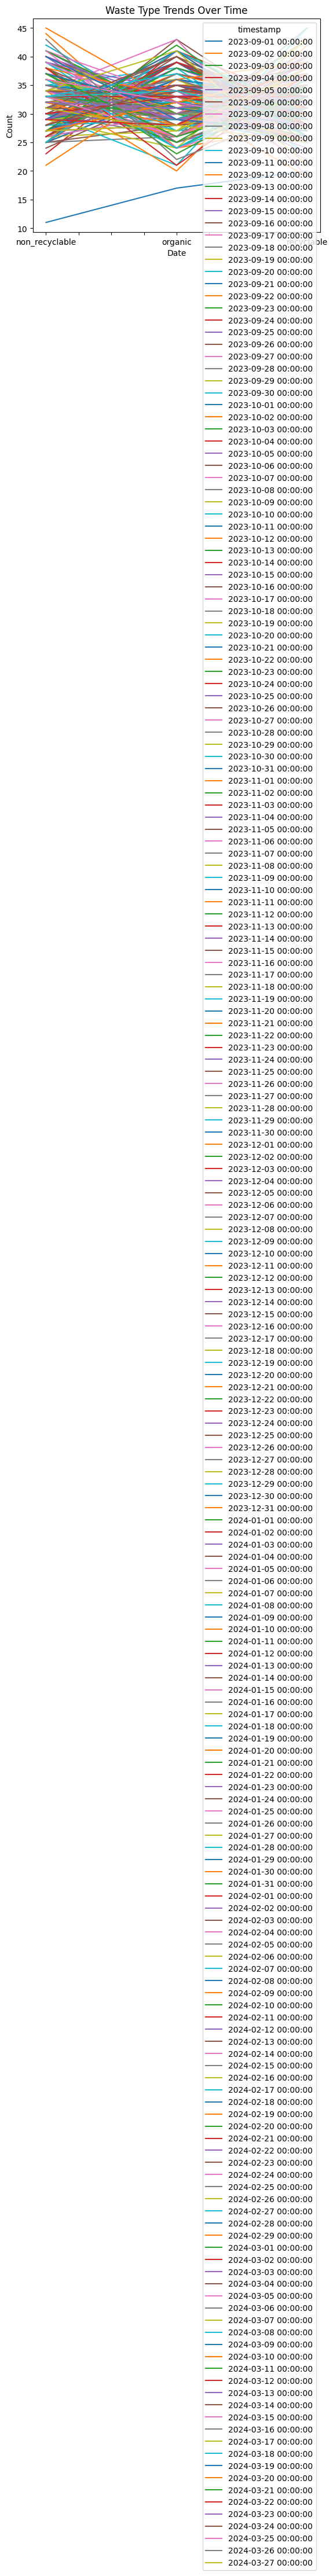

In [ ]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset.set_index('timestamp', inplace=True)

waste_trends = dataset.groupby(['waste_type']).resample('D').count()['sensor_id']
waste_trends.unstack().plot(kind='line')
plt.title('Waste Type Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a column 'waste_type'

# Step 3: Encode the target variable (waste_type)
label_encoder = LabelEncoder()
data["waste_type"] = label_encoder.fit_transform(data["waste_type"])

# Store original class names for later use
class_names = label_encoder.classes_

# Step 4: Split features and target
X = data.drop(columns=["waste_type"])
y = data["waste_type"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train_scaled, y_train)

# Step 8: Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=class_names)

print("Initial Accuracy:", accuracy)
print("Initial Classification Report:\n", report)

# Step 9: Check class distribution
class_counts = y.value_counts()
print("Class Distribution:\n", class_counts)

# Step 10: Visualize feature correlations
corr_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Step 11: Handle class imbalance using resampling
majority_class = data[data["waste_type"] == class_counts.idxmax()]
resampled_data = []

for cls in class_counts.index:
    class_subset = data[data["waste_type"] == cls]
    if len(class_subset) < class_counts.max():
        class_subset = resample(class_subset, replace=True, n_samples=class_counts.max(), random_state=42)
    resampled_data.append(class_subset)

balanced_data = pd.concat(resampled_data)
X_balanced = balanced_data.drop(columns=["waste_type"])
y_balanced = balanced_data["waste_type"]

# Step 12: Scale features again
X_balanced_scaled = scaler.fit_transform(X_balanced)

# Step 13: Retrain Random Forest on balanced data
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced_scaled, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)
rf_model_balanced = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=20)
rf_model_balanced.fit(X_train_bal, y_train_bal)

# Step 14: Evaluate the new model
y_pred_bal = rf_model_balanced.predict(X_test_bal)
accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
report_bal = classification_report(y_test_bal, y_pred_bal, target_names=class_names)

print("Balanced Accuracy:", accuracy_bal)
print("Balanced Classification Report:\n", report_bal)



TypeError: object of type 'numpy.int64' has no len()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings to sample
    cv=3,  # Cross-validation splitting
    verbose=2,  # Higher verbosity level
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform hyperparameter tuning on the balanced dataset
rf_random.fit(X_train_bal, y_train_bal)

# Get the best parameters and score
best_params = rf_random.best_params_
best_model = rf_random.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test_bal)
accuracy_tuned = accuracy_score(y_test_bal, y_pred_tuned)
report_tuned = classification_report(y_test_bal, y_pred_tuned, target_names=label_encoder.classes_)

print("Best Hyperparameters:", best_params)
print("Tuned Model Accuracy:", accuracy_tuned)
print("Tuned Classification Report:\n", report_tuned)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Tuned Model Accuracy: 0.6210995542347697
Tuned Classification Report:
                 precision    recall  f1-score   support

non_recyclable       0.54      0.53      0.53      1346
       organic       0.66      0.67      0.66      1346
    recyclable       0.66      0.67      0.67      1346

      accuracy                           0.62      4038
     macro avg       0.62      0.62      0.62      4038
  weighted avg       0.62      0.62      0.62      4038

